In [272]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [273]:
df = pd.read_csv("formatted_data.csv")
df_clean = df.drop(columns=["Unnamed: 0"], errors="ignore") # dropping the index column

boolean_columns = ["schoolsup", "famsup", "paid", "activities", "nursery", "higher", "internet", "romantic"]
df_clean[boolean_columns] = df_clean[boolean_columns].apply(lambda x: x.map({"yes": 1, "no":0})) #converting boolean data to numerical data representations

binary_columns = ["school", "sex", "address", "famsize", "Pstatus", "result"]
df_encoded = pd.get_dummies(df_clean, columns = binary_columns, drop_first= True ) #one-hot encoded (dummy) variables to handle categorical data

categorical_columns = ["Mjob", "Fjob", "reason", "guardian"]
df_encoded = pd.get_dummies(df_encoded, columns = categorical_columns, drop_first = False)

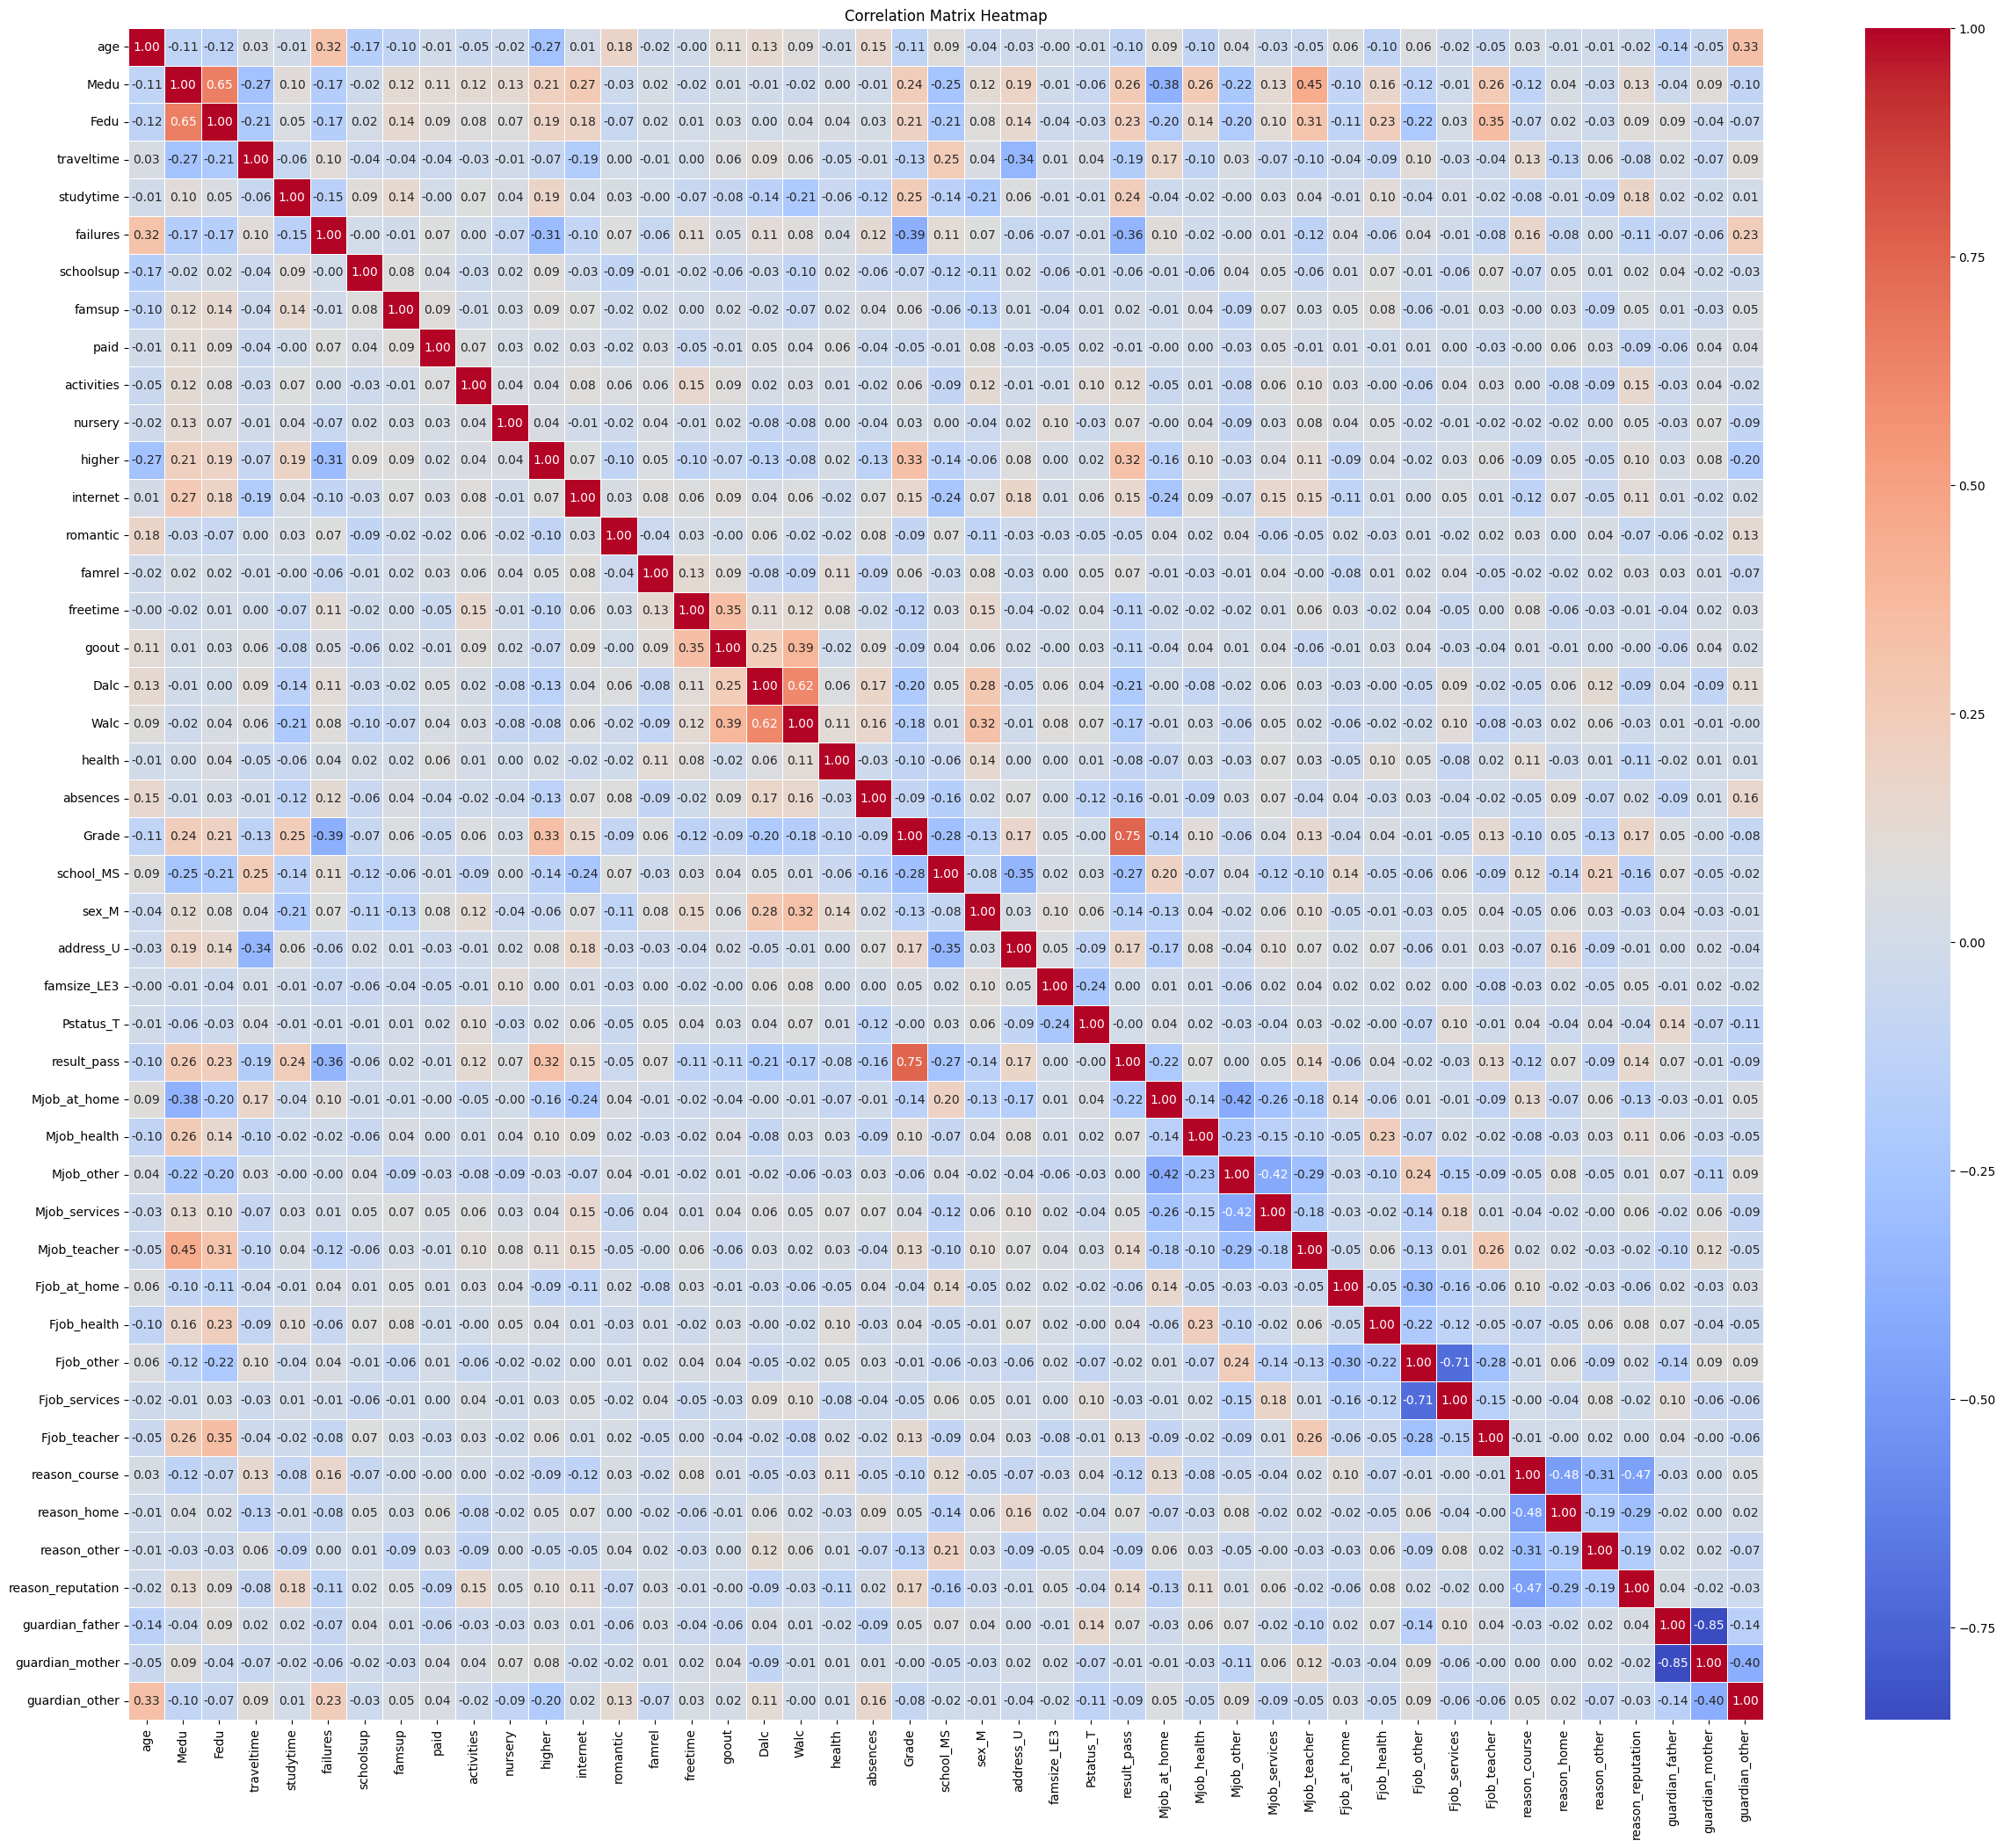

In [274]:
correlation_matrix = df_encoded.corr()
plt.figure(figsize=(30,25))
sns.heatmap (correlation_matrix, cmap= "coolwarm", annot = True, fmt= ".2f", linewidths= 0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [275]:
print(df_encoded.dtypes)
print(df_encoded.columns)
print(df_encoded.head())

age                  int64
Medu                 int64
Fedu                 int64
traveltime           int64
studytime            int64
failures             int64
schoolsup            int64
famsup               int64
paid                 int64
activities           int64
nursery              int64
higher               int64
internet             int64
romantic             int64
famrel               int64
freetime             int64
goout                int64
Dalc                 int64
Walc                 int64
health               int64
absences             int64
Grade                int64
school_MS             bool
sex_M                 bool
address_U             bool
famsize_LE3           bool
Pstatus_T             bool
result_pass           bool
Mjob_at_home          bool
Mjob_health           bool
Mjob_other            bool
Mjob_services         bool
Mjob_teacher          bool
Fjob_at_home          bool
Fjob_health           bool
Fjob_other            bool
Fjob_services         bool
F

In [276]:
"""Significance of Parent's Categories to Results"""

bool_columns = [
    'school_MS', 'sex_M', 'address_U', 'famsize_LE3', 'Pstatus_T',
    'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher',
    'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 
    'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other'
    ]

# Converted boolean to numeric (1/0)
df_encoded[bool_columns] = df_encoded[bool_columns].astype(int)

X = df_encoded[['Medu', 'Fedu', 'Mjob_at_home',
       'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher',
       'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services',
       'Fjob_teacher', 'Dalc', 'Walc' ]]
X = sm.add_constant(X)  

y = df_encoded['result_pass']

# Logistic Regression
logit_model = sm.Logit(y, X)
result = logit_model.fit()

print(result.summary())
# (P>|z|): If p < 0.05, the feature significantly affects passing.


# df['result'] = df['result'].map({'pass': 1, 'fail': 0})
# X = df[['Medu', 'Fedu']]
# X = sm.add_constant(X)  

# y = df['result']

# Logistic Regression
# logit_model = sm.Logit(y, X)
# result = logit_model.fit()

# print(result.summary())


Optimization terminated successfully.
         Current function value: 0.614806
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:            result_pass   No. Observations:                  649
Model:                          Logit   Df Residuals:                      636
Method:                           MLE   Df Model:                           12
Date:                Mon, 03 Mar 2025   Pseudo R-squ.:                  0.1097
Time:                        12:26:32   Log-Likelihood:                -399.01
converged:                       True   LL-Null:                       -448.15
Covariance Type:            nonrobust   LLR p-value:                 1.208e-15
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0369   1.38e+07   2.66e-09      1.000   -2.71e+07    2.71e+07
Medu              0.

In [277]:
"""Significance of Student Categories to Results"""

X = df_encoded[['age','traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 
        'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 
        'famrel', 'freetime', 'goout', 'health', 'absences', 'school_MS', 
        'sex_M', 'address_U', 'famsize_LE3', 'Pstatus_T', 'reason_course', 'reason_home', 
        'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other']]
X = sm.add_constant(X)  

y = df_encoded['result_pass']

# Logistic Regression
logit_model = sm.Logit(y, X)
result = logit_model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.485505
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:            result_pass   No. Observations:                  649
Model:                          Logit   Df Residuals:                      621
Method:                           MLE   Df Model:                           27
Date:                Mon, 03 Mar 2025   Pseudo R-squ.:                  0.2969
Time:                        12:26:35   Log-Likelihood:                -315.09
converged:                       True   LL-Null:                       -448.15
Covariance Type:            nonrobust   LLR p-value:                 3.750e-41
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.8957        nan        nan        nan         nan         nan
age     

In [278]:
"""Combination of Parent's and Student's Caegories to Results"""

X = df_encoded[['Medu', 'Fedu', 'Mjob_at_home',
       'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher',
       'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services',
       'Fjob_teacher', 'Dalc', 'Walc', 'age','traveltime', 
       'studytime', 'failures', 'schoolsup', 'famsup', 
       'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 
       'famrel', 'freetime', 'goout', 'health', 'absences', 'school_MS', 
       'sex_M', 'address_U', 'famsize_LE3', 'Pstatus_T', 'reason_course', 'reason_home', 
       'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other']]
X = sm.add_constant(X)  

y = df_encoded['result_pass']

# Logistic Regression
logit_model = sm.Logit(y, X)
result = logit_model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.463765
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:            result_pass   No. Observations:                  649
Model:                          Logit   Df Residuals:                      609
Method:                           MLE   Df Model:                           39
Date:                Mon, 03 Mar 2025   Pseudo R-squ.:                  0.3284
Time:                        12:26:38   Log-Likelihood:                -300.98
converged:                       True   LL-Null:                       -448.15
Covariance Type:            nonrobust   LLR p-value:                 6.400e-41
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.4547   6.01e+06  -2.42e-07      1.000   -1.18e+07    1.18e+07
Medu   

In [279]:
#Variance Inflation Factor (VIF)

X = df_encoded[['Medu', 'Fedu', 'Mjob_at_home',
       'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher',
       'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services',
       'Fjob_teacher', 'Dalc', 'Walc', 'age','traveltime', 
       'studytime', 'failures', 'schoolsup', 'famsup', 
       'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 
       'famrel', 'freetime', 'goout', 'health', 'absences', 'school_MS', 
       'sex_M', 'address_U', 'famsize_LE3', 'Pstatus_T', 'reason_course', 'reason_home', 
       'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other']]  

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

#VIF > 10: Strong multicollinearity (consider dropping or combining variables).
#VIF between 5-10: Moderate multicollinearity (investigate further).
#VIF < 5: Generally acceptable.

              Feature       VIF
0                Medu  2.689336
1                Fedu  2.094496
2        Mjob_at_home       inf
3         Mjob_health       inf
4          Mjob_other       inf
5       Mjob_services       inf
6        Mjob_teacher       inf
7        Fjob_at_home       inf
8         Fjob_health       inf
9          Fjob_other       inf
10      Fjob_services       inf
11       Fjob_teacher       inf
12               Dalc  1.827915
13               Walc  2.111756
14                age  1.413515
15         traveltime  1.295035
16          studytime  1.229195
17           failures  1.342594
18          schoolsup  1.135746
19             famsup  1.129252
20               paid  1.098657
21         activities  1.138994
22            nursery  1.065407
23             higher  1.271605
24           internet  1.245317
25           romantic  1.116791
26             famrel  1.123401
27           freetime  1.271788
28              goout  1.456815
29             health  1.137119
30      

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [280]:
# Drop one category from each set of dummies to escape the dummy variables trap
df_vif = df_encoded.drop(columns=[
    "Mjob_other",  
    "Fjob_other",  
    "reason_other",  
    "guardian_other"  
])

X = df_vif.select_dtypes(include=[float, int])

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


              Feature        VIF
0                 age  87.320762
1                Medu  15.827102
2                Fedu  11.331693
3          traveltime   6.710366
4           studytime   7.993876
5            failures   1.642203
6           schoolsup   1.253506
7              famsup   2.883306
8                paid   1.169858
9          activities   2.215476
10            nursery   5.397171
11             higher  11.964412
12           internet   5.355215
13           romantic   1.777909
14             famrel  19.897867
15           freetime  12.514433
16              goout  12.137195
17               Dalc   6.676578
18               Walc   8.781789
19             health   7.922348
20           absences   1.971892
21              Grade  22.270542
22          school_MS   2.323931
23              sex_M   2.353586
24          address_U   4.323349
25        famsize_LE3   1.626107
26          Pstatus_T   9.595460
27       Mjob_at_home   1.739548
28        Mjob_health   1.560343
29      Mj

In [281]:
df_vif2 = df_vif.drop(columns=[ "famrel", "Grade", "freetime", "age", "goout", "Medu", "Fedu"]) #Drop columns due to high VIF

X = df_vif2.select_dtypes(include=[float, int])

vif_data2 = pd.DataFrame()
vif_data2["Feature"] = X.columns
vif_data2["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data2)

              Feature        VIF
0          traveltime   6.069530
1           studytime   7.231297
2            failures   1.371537
3           schoolsup   1.231004
4              famsup   2.835545
5                paid   1.133676
6          activities   2.152876
7             nursery   5.144384
8              higher  10.840531
9            internet   4.945898
10           romantic   1.706318
11               Dalc   6.443402
12               Walc   7.550306
13             health   7.004013
14           absences   1.888179
15          school_MS   2.111897
16              sex_M   2.235380
17          address_U   4.025698
18        famsize_LE3   1.602237
19          Pstatus_T   8.911329
20       Mjob_at_home   1.654005
21        Mjob_health   1.379185
22      Mjob_services   1.761149
23       Mjob_teacher   1.580796
24       Fjob_at_home   1.216850
25        Fjob_health   1.216480
26      Fjob_services   1.683751
27       Fjob_teacher   1.259031
28      reason_course   4.817517
29        

In [271]:
df_vif2['result_pass'] = df_vif2['result_pass'].map({True: 1 , False: 0})
df_vif2.to_csv('df_vif_cleaned.csv', index=False)